# Project: Wrangling and Analyze Data

### (Dog Classes)

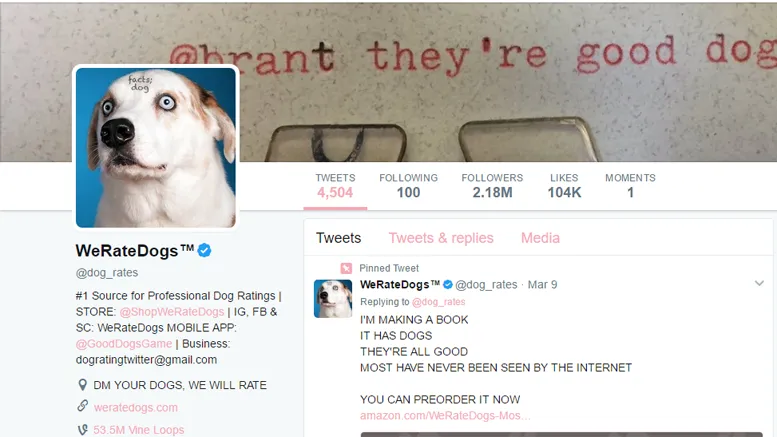

#### Import relevant libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
import requests
import os
import json
import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#data is in same directory as the notebook
data = pd.read_csv('twitter-archive-enhanced.csv')

#call head function to check first 5 rows of dataframe
data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:

images = 'Images folder'
if not os.path.exists(images):
    os.makedirs(images)

In [4]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)

In [5]:
with open(os.path.join(images,URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
link = 'Images folder/image-predictions.tsv'
#read the data
df_req = pd.read_csv(link, sep = '\t')

df_req.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.json', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
tweets = []
for line in open('tweet-json.json', 'r'):
    tweets.append(json.loads(line))

In [11]:
tweets[0]['favorite_count']

39467

In [12]:
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [13]:
# Creating a dataframe to store the extracted features from the created list
df_json = pd.DataFrame(columns = ['tweet_id' ,
                        'retweet_count' ,
                        'favorite_count'])
df_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [14]:

# Storing the selected features in df_json dataframe
length = len(tweets)
columns = ['id','retweet_count', 'favorite_count']
for i in range(length):
    ids = tweets[i]['id']
    retweets = tweets[i]['retweet_count']
    count = tweets[i]['favorite_count']
    dicti = {'tweet_id': int(ids),
         'retweet_count': retweets,
         'favorite_count': count}
    dicts = pd.DataFrame(dicti, columns = df_json.columns, index=[i])
    df_json = pd.concat([df_json,dicts], ignore_index = True)

In [16]:
df_json.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [60]:
#getting info of the data from the twitter archive
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)

There are 2297 tweets with expanded_urls

The timestamp field is in string format (object) and the tweet_id is integer format.

There are 4 columns for dog stages (doggo, floofer, pupper, puppo)



In [61]:
# Showing null values for each column
data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [62]:
#checking the number of duplicated values
data.duplicated().sum()

0

We have significant amount of missing data in 5 columns and there are no duplicated value

In [63]:
data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [64]:
data['name'].duplicated().sum()

1399

In [65]:
data.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
Buddy           7
an              7
Bailey          7
Toby            7
Bella           6
Jack            6
Jax             6
Scout           6
Koda            6
Oscar           6
Milo            6
Rusty           6
Leo             6
Dave            6
Stanley         6
Alfie           5
             ... 
Ricky           1
Rilo            1
Napolean        1
Monkey          1
Rufio           1
Mary            1
Tommy           1
Dug             1
Arnold          1
Torque          1
Ace             1
Kellogg         1
Leonard         1
Alexander       1
Eugene          1
Ember           1
Andru           1
Clarkus         1
Nida            1
Brandonald      1
Billy           1
Meatball        1
Pluto           1
Orion           1
Josep     

In the name column, a signicant number of names are 'None' and about 55 names are 'a'. This doesn't tell a lot

In [66]:
# Showing records having more than one dog stage

data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [67]:
data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [68]:
data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [69]:
data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [70]:
# No of unique values in rating denominator column
data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [71]:
data.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [72]:
#getting info of the data from the request info
df_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [73]:
# Showing null values for each column
df_req.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [74]:
#checking the number of duplicated values
df_req.duplicated().sum()

0

In [75]:
df_req.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [76]:
#getting info of the data from the twitter api
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [77]:
# Showing null values for each column
df_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [78]:
#checking the number of duplicated values
df_json.duplicated().sum()

0

In [79]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


In [80]:
# Showing all records having 0s in the favorite_count column
df_json.query("favorite_count == 0")

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
77,877611172832227328,83,0
90,874434818259525634,15546,0
94,873697596434513921,12518,0
96,873337748698140672,1667,0
100,872668790621863937,31,0


### Quality issues
1. There are significant number of missing values in the twitter archive dataset

2. The name column has a lot of duplicated values and some names are None

3. Tweet ids are currently in integer but they should be strings

4. The timestamp is in integer format rather than datetime

5. Nulls represented as None in name column

6. rating_denominator contains values other than 10, minimum is 0

7. The url still has source display

8. There are Urls in the end of the 'text'.

### Tidiness issues
1. The dog stages are in separate columns but they should be in one

2. The three dataset have tweet id in common, hence could be combined

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [98]:
# Make copies of original pieces of data
data_original = data.copy
df_req_original = df_req.copy()
df_json_original = df_json.copy()

### Issue #1: Multiple DataFrame

#### Define: Merging the dataframes based on tweet_id

#### Code

In [100]:

df = pd.merge(data, df_req, how='outer', on='tweet_id', sort=True)
df_json['tweet_id'] = df_json['tweet_id'].astype(int) #tweet_id in the 3rd dataframe is object,
#converting it to int to match the other two, might convert all to object later
df = pd.merge(df, df_json, how='outer', on='tweet_id', sort=True)

In [101]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #2: Missing Values

#### Define: fixing Null and None values


#### Code

In [102]:
df.dropna(subset = ['p1', 'p1_conf', 'p1_dog'], how = 'all', inplace=True)

In [103]:
df.favorite_count.replace(0, np.nan, inplace=True)

In [104]:
mode_ret = df.retweet_count.mode()[0]
mode_fav = df.favorite_count.mode()[0]
df.retweet_count.fillna(mode_ret, inplace=True)
df.favorite_count.fillna(mode_fav, inplace=True)

#### Test

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

### Issue #3: Source Html Tag in Url

#### Define: Extracting only URL

#### Code

In [106]:
df.source = df.source.str.extract('"([^"]*)" ')

#### Test

In [107]:
df.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #4: rating_denominator column contains values less and larger than 10

#### Define: Fixing denominator values other than 10

#### Code

In [108]:
df.rating_denominator.value_counts()

10     2057
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [109]:
df.rating_denominator = 10

In [110]:
df.rating_denominator.value_counts()

10    2075
Name: rating_denominator, dtype: int64

### Issue #5: Existence of retweets therefore there is duplicates

#### Define: Getting rid of retweets that is causing duplicates

#### Code

In [111]:
retweet_ind = df[~df['retweeted_status_id'].isna()].index
df.drop(index=retweet_ind, inplace = True)
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                 'retweeted_status_timestamp'], axis = 1, inplace =True)


In [112]:
df.reset_index(inplace = True)

#### Test

In [113]:
df.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #6: Erraneous datatypes in (favorite_count, retweet_count, p_dog, img_num and timestamp) columns

#### Code

In [114]:
df['tweet_id'] = df['tweet_id'].astype(str)

In [115]:

df.favorite_count = df.favorite_count.astype(int)
df.retweet_count = df.retweet_count.astype(int)

In [116]:
df.p1_dog = df['p1_dog'].replace({'True': True, 'False': False})
df['p2_dog'] =  df['p2_dog'].replace({'True': True, 'False': False})
df.p3_dog = df['p3_dog'].replace({'True': True, 'False': False})

In [117]:
df.timestamp = pd.to_datetime(df.timestamp)

In [118]:
df.img_num = df.img_num.astype(int)

#### Test

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 28 columns):
index                    1994 non-null int64
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog          

### Issue #7: name column  Nulls represented as None

#### Define : Replacing None values in the name column with NaN

#### Code

In [122]:
df.name = df.name.replace('None', np.nan)

#### Test

In [123]:
df.name.unique()[0:5]

array([nan, 'a', 'an', 'the', 'quite'], dtype=object)

### Issue #8: name column have multiple invalid values ('a', 'an', 'the')

#### Define: Replacing the invalid names with NaN

#### Code

In [124]:

name_dict = {'a' : np.nan, 'an' : np.nan, 'the' : np.nan}

In [126]:
def replace_invalid(ds):
    if ds['name'] in name_dict.keys():
        valid = name_dict[ds['name']]
        return valid
    else:
        return ds['name']
    
df['name'] = df.apply(replace_invalid, axis=1)

#### Test

In [127]:
df.name.unique()[0:5]

array([nan, 'quite', 'Walter', 'Scout', 'Kreggory'], dtype=object)

### Issue #9: dog stage columns contain multiple dog stage at once


#### Define: Cleaning the records that contain more than one stage value referring to their text

In [128]:
df[(df.doggo != 'None') & (df.pupper != 'None')]['text']

1152    Like father (doggo), like son (pupper). Both 1...
1198    This is just downright precious af. 12/10 for ...
1289    Please stop sending it pictures that don't eve...
1341    Meet Maggie &amp; Lila. Maggie is the doggo, L...
1483    This is Pinot. He's a sophisticated doggo. You...
1568    This is Bones. He's being haunted by another d...
1574    Like doggo, like pupper version 2. Both 11/10 ...
1596    Here we have Burke (pupper) and Dexter (doggo)...
1653    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

In [131]:
df[(df.doggo != 'None') & (df.floofer != 'None')|((df.doggo != 'None') & (df.puppo != 'None'))]['text']

1839    At first I thought this was a shy doggo, but i...
1845    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object

In [133]:
df[(df.doggo != 'None') & (df.floofer != 'None')|((df.doggo != 'None') & (df.puppo != 'None'))]['text'][1839]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [135]:
for i,row in df[(df.doggo != 'None')&(df.floofer != 'None')|((df.doggo != 'None')&(df.puppo != 'None'))].iterrows():
    df.at[i,'doggo'] = 'None'

In [136]:
for i, row in df[(df.doggo != 'None') & (df.pupper != 'None')].iterrows():
    df.at[i,'pupper'] = 'None'

#### Test

In [137]:

df[(df.doggo != 'None') & (df.floofer != 'None')
                   | ((df.doggo != 'None') & (df.puppo != 'None'))]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #10:  multiple dog stage in different columns

#### Define: Merge all dog stages into a clumn and convert to categorical variable

In [138]:
df_test = df[['tweet_id', 'pupper' ,'floofer', 'doggo', 'puppo']].copy()

In [139]:
df_test['stage'] = df_test[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [140]:
df_test.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis= 1 , inplace =True)

In [141]:
df = pd.merge(df, df_test, on = 'tweet_id', sort = True)

In [142]:
df.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'stage'],
      dtype='object')

In [143]:
df.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis = 1, inplace = True)

In [144]:
df['stage'] = df['stage'].astype('category')

In [145]:
df.reset_index(inplace= True)

#### Test

In [146]:
df.stage.value_counts()

None       1688
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

### Issue #11: dog_breed must be added based on the img_num and p1_dog

#### Define: Creating new dog_breed column based on the img_num prediction then dropping all prediction column

In [147]:

df.img_num.value_counts()

1    1711
2     191
3      62
4      30
Name: img_num, dtype: int64

In [148]:

for i, row in df.iterrows():
    if (row['img_num'] == 1 | row['img_num'] == 4) & row['p1_dog']:
        p = row['p1']
    elif row['img_num'] == 2 & row['p2_dog'] :
        p = row['p2']
    elif row['img_num'] == 3 & row['p3_dog'] :
        p = row['p3']
        
    df.at[i,'dog_breed'] = p

In [149]:
drop_col = ['index','img_num', 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

In [150]:
df.drop(drop_col, axis = 1, inplace = True)

#### Test

In [151]:

df['dog_breed'].value_counts()

Labrador_retriever                112
Chihuahua                          79
golden_retriever                   70
kuvasz                             51
Eskimo_dog                         49
Staffordshire_bullterrier          41
Chesapeake_Bay_retriever           41
toy_poodle                         40
chow                               39
American_Staffordshire_terrier     39
Pomeranian                         38
kelpie                             38
French_bulldog                     37
malamute                           36
Pembroke                           35
basenji                            34
beagle                             34
Great_Pyrenees                     34
cocker_spaniel                     31
Pekinese                           31
Siberian_husky                     29
bull_mastiff                       28
Cardigan                           27
West_Highland_white_terrier        26
Shetland_sheepdog                  25
toy_terrier                        25
standard_poo

In [152]:
df.head()

,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,stage,dog_breed
0,0,666020888022790149,NaN,NaN,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,532,2535,None,Shetland_sheepdog
1,1,666029285002620928,NaN,NaN,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,48,132,None,Rhodesian_ridgeback
2,2,666033412701032449,NaN,NaN,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,47,128,None,bloodhound
3,3,666044226329800704,NaN,NaN,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,147,311,None,miniature_pinscher
4,4,666049248165822465,NaN,NaN,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,41,111,None,Doberman


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [153]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
df = pd.read_csv('twitter_archive_master.csv')

In [163]:
df.describe()

,level_0,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1994.000000,2.300000e+01,2.300000e+01,1994.000000,1994.0,1994.000000,1994.000000
mean,996.500000,6.978112e+17,4.196984e+09,12.280843,10.0,2766.753260,8895.725677
std,575.762538,4.359384e+16,0.000000e+00,41.497718,0.0,4674.698447,12213.193181
min,0.000000,6.671522e+17,4.196984e+09,0.000000,10.0,16.000000,81.000000
25%,498.250000,6.732411e+17,4.196984e+09,10.000000,10.0,624.750000,1982.000000
50%,996.500000,6.757073e+17,4.196984e+09,11.000000,10.0,1359.500000,4136.000000
75%,1494.750000,7.031489e+17,4.196984e+09,12.000000,10.0,3220.000000,11308.000000
max,1993.000000,8.558181e+17,4.196984e+09,1776.000000,10.0,79515.000000,132810.000000


In [165]:

year= df.groupby(df['timestamp'].dt.year)['retweet_count'].sum()
year

timestamp
2015     717854
2016    2660493
2017    2138559
Name: retweet_count, dtype: int64

In [169]:

df_x = df[df['stage'] != 'None'].copy()
df_x =  df_x[df_x['rating_numerator'] >= 10]

In [172]:
df_x.stage.replace('None', np.nan, inplace =True)

In [173]:
df_x.groupby('stage')['rating_numerator'].mean()

stage
None             NaN
doggo      12.044118
floofer    11.875000
pupper     11.371951
puppo      12.181818
Name: rating_numerator, dtype: float64

In [174]:
df_x['year'] = df_x['timestamp'].dt.year

In [175]:
df_x.groupby('year')['retweet_count'].sum()

year
2015     65197
2016    565351
2017    475908
Name: retweet_count, dtype: int64

In [176]:
df['name'].value_counts().head()

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Name: name, dtype: int64

### Insights:
1. The highest number of retweet is recorded in 2016

2. Puppo dog stage had the highest average rating

3. The most common name is Charlie followed by Cooper, Lucy and Oliver with the same count

4. For ratings greater or eqaul to 10, there is a large increase in retweet between 2015 to 2016  and then decrease in 2017

### Visualization

Text(0.5,1,'Favourite distribution')

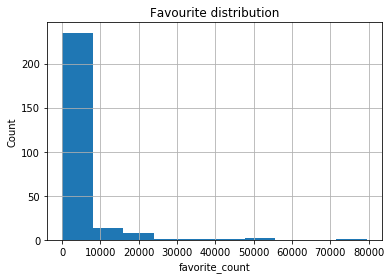

In [182]:
#distribution
df_x.retweet_count.hist()
plt.xlabel('favorite_count')
plt.ylabel('Count')
plt.title('Retweet distribution')


Text(0.5,1,'Rating Distribution')

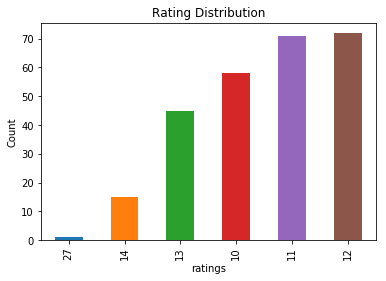

In [183]:
df_x.rating_numerator.value_counts().sort_values().plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('Count')
plt.title('Rating Distribution')

Distribution is left skewed and the outlier isn't really significant

Text(0.5,1,'Most common dogtype')

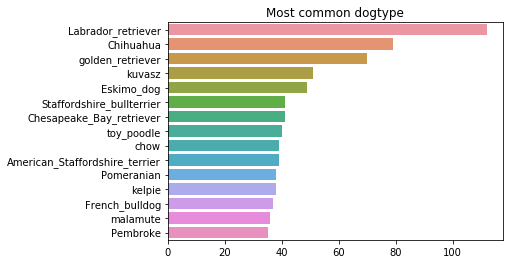

In [157]:
#most common dog breed
import seaborn as sns
import matplotlib.pyplot as plt

dog_type = df['dog_breed'].value_counts()[:15]
sns.barplot(dog_type.values, dog_type.index)
plt.title('Most common dogtype')

The most common dog breed is the Labrador Retriever

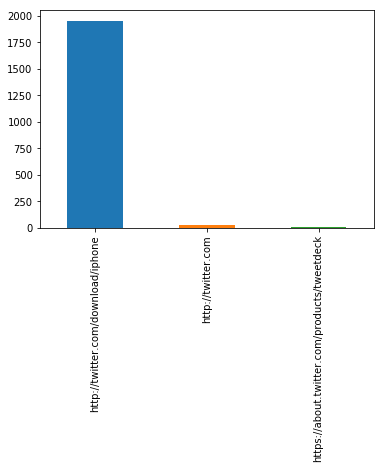

In [184]:
# number of tweet by phones
df['source'].value_counts().plot(kind ='bar')
#sns.barplot(plot.values, plot.index)

#### There are more tweets from iphone compared to other source

### Next Steps

1. Create more Visualizations to understand the breeds.
2. Furyher analyze the tweets from other sources.